In [1]:
# The usual preamble
%matplotlib inline
#%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)

plt.rcParams['figure.figsize'] = (15, 5)
def getMap(df,column):
    indexMap = {}
    for i,value in enumerate(df[column].value_counts().index):
        indexMap[value]=i
    return indexMap

In [2]:
sfcrime = pd.read_csv('../data/train.csv',parse_dates='Dates',index_col='Dates')
sfcrime
sfcrime_test = pd.read_csv('../data/test.csv',parse_dates='Dates',index_col='Dates')
sfcrime_test

,Id,DayOfWeek,PdDistrict,Address,X,Y
Dates,,,,,,
2015-05-10 23:59:00,0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
2015-05-10 23:51:00,1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2015-05-10 23:50:00,2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
2015-05-10 23:45:00,3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
2015-05-10 23:45:00,4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
2015-05-10 23:40:00,5,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172
2015-05-10 23:30:00,6,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351
2015-05-10 23:30:00,7,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750
2015-05-10 23:10:00,8,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165


What are the different types of crimes?

In [3]:
sfcrime['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

How do different crimes vary by time of day?
Add features for the hour in the day, day of the week, year, month, and day of the year.

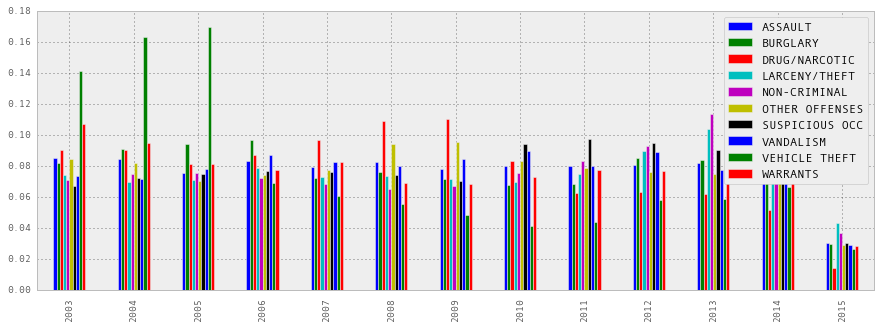

In [4]:
def crime_by_time(df,crime,unit="Hour"):
    crime = df[df['Category'] == crime].copy()
    if unit=="Hour":
        crime.loc[:,unit] = crime.index.hour
    elif unit=="Day":
        crime.loc[:,unit] = crime.index.dayofyear
    elif unit=="Year":
        crime.loc[:,unit] = crime.index.year
    elif unit=="Month":
        crime.loc[:,unit] = crime.index.month
    elif unit=="Weekday":
        crime.loc[:,unit] = crime.index.weekday

    crime[unit].astype(int)
    return crime[unit].value_counts()

topCrimes = 10
dset = {}
for category,norm in zip(sfcrime['Category'].value_counts()[:topCrimes].index,sfcrime['Category'].value_counts()[:topCrimes]):
    dset[category]=crime_by_time(sfcrime,category,unit="Year") 
    dset[category] = dset[category].div(norm)
combined = pd.DataFrame(dset)
combined.sort_index().plot(kind='bar')
#.sort_index().plot() #kind='bar')
sfcrime['Hour'] = sfcrime.index.hour
sfcrime['Weekday'] = sfcrime.index.weekday
sfcrime['Year'] = sfcrime.index.year
sfcrime['Month'] = sfcrime.index.month
sfcrime['Day'] = sfcrime.index.dayofyear
#sfcrime

And in which districts?

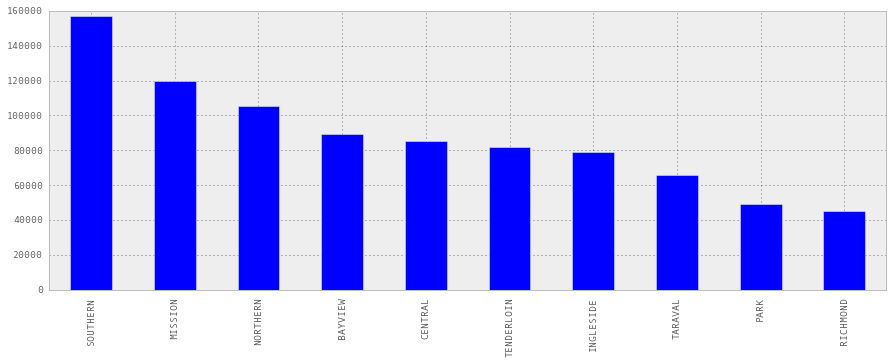

In [5]:
sfcrime['PdDistrict'].value_counts().plot(kind='bar')

Are certain crimes more common in certain districts? 
Here I add a feature for each category which encodes the relative fractions of crimes of that type for the district. So, for instance 48% of prostitution cases occur in the mission district so the value of the 'PROSTITUTION' feature is 0.48 for crimes occuring in that district.
One problem with this is that it is derived in the training data.

In [6]:

def group_by_district(df, district):
    return df[df['PdDistrict']==district].copy()
dset = {}
for district in sfcrime['PdDistrict'].unique():
    dset[district] = group_by_district(sfcrime,district)['Category'].value_counts()
dfCrimesPerDistrict = pd.DataFrame(dset)
normalizedByCrimeDF = dfCrimesPerDistrict.div(dfCrimesPerDistrict.sum(axis=1), axis=0)
normalizedByCrimeDF 

crimeRateFeatures = normalizedByCrimeDF[sfcrime['PdDistrict']].transpose()
crimeRateFeatures.index = sfcrime.index
for category in crimeRateFeatures:
    sfcrime[category] = crimeRateFeatures[category]
normalizedByCrimeDF.transpose()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
BAYVIEW,0.259749,0.128219,0.083744,0.193772,0.106924,0.050694,0.078924,0.083341,0.056776,0.085763,0.050781,0.148676,0.072957,0.051922,0.198630,0.133704,0.057856,0.059905,0.040816,0.193851,0.066075,0.135146,0.090909,0.009353,0.234226,0.118043,0.136177,0.166450,0.088195,0.148649,0.087445,0.072835,0.124339,0.500000,0.086814,0.119754,0.134230,0.102383,0.192519
CENTRAL,0.073364,0.090757,0.160099,0.041522,0.122949,0.114352,0.070547,0.033444,0.120794,0.154374,0.199219,0.057026,0.107833,0.140536,0.212329,0.084152,0.143282,0.074094,0.057143,0.051868,0.118521,0.070541,0.090909,0.103955,0.056724,0.086913,0.022097,0.070506,0.089790,0.047297,0.112335,0.118110,0.090469,0.166667,0.123396,0.099922,0.078280,0.065784,0.056926
INGLESIDE,0.120291,0.110997,0.078818,0.183391,0.090627,0.039583,0.090829,0.043968,0.044393,0.066895,0.113281,0.144603,0.092092,0.072726,0.109589,0.148654,0.058525,0.055702,0.021224,0.122398,0.074244,0.104635,NaN,0.003474,0.210962,0.121217,0.076053,0.130195,0.114859,0.148649,0.076432,0.127953,0.100815,NaN,0.056784,0.120157,0.166602,0.059885,0.132086
MISSION,0.095836,0.145026,0.113300,0.228374,0.101891,0.254398,0.157407,0.162254,0.182710,0.106346,0.101562,0.289206,0.120747,0.118113,0.123288,0.133276,0.104191,0.260116,0.155918,0.126323,0.134035,0.153191,0.136364,0.484901,0.103569,0.157783,0.153135,0.144116,0.163628,0.236486,0.138987,0.141732,0.121220,0.166667,0.139367,0.118368,0.132909,0.156702,0.155348
NORTHERN,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,0.065160,0.157551,0.075263,0.110938,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227
PARK,0.042961,0.045723,0.036946,0.024221,0.078574,0.062731,0.077601,0.047674,0.087383,0.042882,0.031250,0.052953,0.048826,0.058397,0.006849,0.040154,0.052293,0.078297,0.018776,0.104390,0.064190,0.049009,NaN,0.000668,0.037285,0.041609,0.249229,0.044467,0.048314,0.040541,0.038546,0.039370,0.052715,NaN,0.039585,0.058424,0.073688,0.054911,0.041730
RICHMOND,0.068077,0.041651,0.076355,0.027682,0.073351,0.025000,0.140653,0.018510,0.034813,0.036878,0.089844,0.046843,0.058347,0.068170,0.027397,0.044425,0.056564,0.042564,0.006531,0.045519,0.062229,0.044634,0.045455,0.003207,0.039834,0.034217,0.048304,0.052579,0.049225,0.067568,0.045374,0.082677,0.069746,NaN,0.033443,0.071101,0.076551,0.023926,0.038223
SOUTHERN,0.122274,0.158476,0.182266,0.128028,0.131710,0.118287,0.134921,0.170981,0.224065,0.235849,0.148438,0.085540,0.221039,0.206307,0.116438,0.145237,0.239251,0.202312,0.350204,0.117896,0.213913,0.168867,0.181818,0.018038,0.103888,0.168609,0.055498,0.120681,0.186645,0.114865,0.221806,0.116142,0.161234,NaN,0.198744,0.146451,0.087856,0.215616,0.131853
TARAVAL,0.079313,0.071062,0.088670,0.058824,0.094218,0.037500,0.089065,0.028367,0.060514,0.080617,0.140625,0.071283,0.103403,0.092871,0.054795,0.081589,0.067724,0.064109,0.027755,0.130440,0.074959,0.068266,0.181818,0.010957,0.083493,0.061087,0.209661,0.098448,0.087284,0.101351,0.050881,0.116142,0.095371,NaN,0.052689,0.108865,0.114204,0.038305,0.066277
TENDERLOIN,0.039656,0.099888,0.046798,0.051903,0.040484,0.192824,0.045414,0.327880,0.102570,0.078045,0.031250,0.079430,0.052974,0.067750,0.082192,0.090132,0.056621,0.097740,0.164082,0.032052,0.080896,0.108764,0.045455,0.120791,0.043021,0.095739,0.004625,0.072509,0.072926,0.033784,0.074

The distribution of crimes per district does not vary too much. One insight though is that the Tenderloin clearly has a Drug/Narcotic problem with 21.6% of it's crimes coming from that while in the other districts it's only a few percent.

Here are just some of the striking differences:
ARSON is much more common in BAYVIEW
DISORDERLY CONDUCT in the MISSION and TENDERLOIN
DRUNKENNESS in MISSION and SOUTHERN
FAMILY OFFSENSE in MISSION
FORGERY/COUNTERFEITING in SOUTHERN
LARCENY/THEFT in SOUTHERN
Half of all PROSTITUTION occurs in MISSION with another quarter in NORTHERN

This suggests it would be useful to use geography as a predictor. I could also try to use the exact location. It would be interesting to look at some heat maps of each set of crimes.
What about trying to relate specific crimes to each other?

It would be nice to not just have the police district but also it's proximity to other police districts. Here I've attempted to encode this information but adding a feature for each district which tells how close it is to other districts.

In [7]:
#Matrix of proximities with rows of districts in alphabetical order
#This should encode geographic proximities (or correlations) between districts
#This should be a symmetric matrix
#if the district is equal (i.e. diagonal) it gets a 1
#if they share a border it gets a 0.5
#if they do not share a border then they get a 0 unless the borders are unusual and they
#are very close. In that case I use some judgement and assin 0.25
#BAYVIEW	CENTRAL	INGLESIDE	MISSION	NORTHERN	PARK	RICHMOND	SOUTHERN	TARAVAL	TENDERLOIN
geographicProximity = [[1,0,.5,.5,0,0,0,.5,0,0], #bayview
                       [0,1,0,0,.5,0,0,.5,0,.5],#central
                       [.5,0,1,.5,0,.5,0,0,.5,0], #ingleside
                       [.5,0,.5,1,.25,.5,0,.5,0,.25],#mission
                       [0,.5,0,.25,1,.5,.5,.5,0,.5],#northern
                       [0,0,.5,.5,.5,1,.5,.25,.5,.25], #park
                       [0,0,0,0,.5,.5,1,0,.5,0],#richmond
                       [.5,.5,0,.5,.5,.25,0,1,0,.5], #southern
                       [0,0,.5,0,0,.5,.5,0,1,0], #taraval
                       [0,.5,0,.25,.5,.25,0,.5,0,1] #tenderloin
                       ]
geographicProximityMatrix = np.matrix(geographicProximity)
geographicProximityMatrix
print "Dimension:",geographicProximityMatrix.shape
print "Is Symmetric:",(geographicProximityMatrix.transpose()==geographicProximityMatrix).all()
dset={}
for row,header in zip(geographicProximity,np.sort(sfcrime['PdDistrict'].unique())):
    #print row,header
    dset[header]=row
geographicProximityDF = pd.DataFrame(dset)
geographicProximityDF.index = np.sort(sfcrime['PdDistrict'].unique())

geographicProximityDF['BAYVIEW'][sfcrime['PdDistrict']]
for district in geographicProximityDF.index:
    districtCol = geographicProximityDF[district][sfcrime['PdDistrict']]
    districtCol.index = sfcrime.index
    sfcrime[district] = districtCol
#now we have extra features which encode proximity to other districts
sfcrime

Dimension: (10, 10)
Is Symmetric: True


,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Weekday,Year,Month,Day,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,...,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.075263,0.110938,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.075263,0.110938,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.075263,0.110938,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.075263,0.110938,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,2,2015,5,133,0.042961,0.045723,0.036946,0.024221,0.078574,0.062731,0.077601,0.047674,0.087383,0.042882,0.031250,0.052953,0.048826,0.058397,0.006849,0.040154,0.052293,...,0.104390,0.064190,0.049009,NaN,0.000668,0.037285,0.041609,0.249229,0.044467,0.048314,0.040541,0.038546,0.039370,0.052715,NaN,0.039585,0.058424,0.073688,0.054911,0.041730,0.0,0.0,0.5,0.50,0.50,1.00,0.5,0.25,0.5,0.25
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,23,2,2015,5,133,0.120291,0.110997,0.078818,0.183391,0.090627,0.039583,0.090829,0.043968,0.044393,0.066895,0.113281,0.144603,0.092092,0.072726,0.109589,0.148654,0.058525,...,0.122398,0.074244,0.104635,NaN,0.003474,0.210962,0.121217,0.076053,0.130195,0.114859,0.148649,0.076432,0.127953,0.100815,NaN,0.056784,0.120157,0.166602,0.059885,0.132086,0.5,0.0,1.0,0.50,0.00,0.50,0.0,0.00,0.5,0.00
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU

Are certain crimes more likely to be associated with a given oucome?
Definitely. For instance, the vast majority of 'RESOLUTION' of 'LOCATED' are from 'MISSING PERSON' or 'RUNAWAY'

In [5]:
sfcrime['Resolution'].value_counts()

sfcrime['ResolutionIndexed'] = sfcrime['Resolution'].replace(getMap(sfcrime,'Resolution'))
sfcrime

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Weekday,Year,Month,Day,ResolutionIndexed
Dates,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133,1
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,2,2015,5,133,1
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,2,2015,5,133,1
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,2,2015,5,133,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,2,2015,5,133,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,23,2,2015,5,133,0
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,23,2,2015,5,133,0
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,23,2,2015,5,133,0
2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,23,2,2015,5,133,0


Have certain crimes changed over time?

In [9]:
sfcrime[sfcrime['Category']=='BURGLARY']['Year'].value_counts()

2006    3550
2005    3463
2004    3330
2012    3135
2013    3070
2003    3017
2014    3006
2008    2800
2007    2655
2009    2633
2011    2515
2010    2491
2015    1090
Name: Year, dtype: int64

Ideas about feature engineering:
One per crime that says the fraction per district
One per district that tells the proximity to other districts: 1 if it is the district, .5 if it shares a border, 0 otherwise
Another that relates the relative overall number of crimes to the district
Might want to check time dependence to see if it makes sense to use same crime per district stats for all time

Should have features for hour, day of week, day of year, year

What about street names? Some of them do seem to be very correlated with certain crimes.
The problem with these addresses is that they contain very little information about proximity to each other. But, they might highlight problem streets.
On the other hand those that haver very few crimes on them tell us not much of anything.
So I have labeled those streets with less than 100 crimes as non-crime streets and they get the same label of "Other"

In [10]:
isCrimeStreet = sfcrime['Address'].value_counts() >100

def labelNonCrimeStreets(x):
    #print crimeStreets.unique()
    try:
        if isCrimeStreet.loc[x]:
            return x
    except:
        pass
    x="Other"
    return x

sfcrime['Address'] = sfcrime['Address'].map(labelNonCrimeStreets)
sfcrime['Address'].value_counts()



Other                                    394572
800 Block of BRYANT ST                    26533
800 Block of MARKET ST                     6581
2000 Block of MISSION ST                   5097
1000 Block of POTRERO AV                   4063
900 Block of MARKET ST                     3251
0 Block of TURK ST                         3228
0 Block of 6TH ST                          2884
300 Block of ELLIS ST                      2703
400 Block of ELLIS ST                      2590
16TH ST / MISSION ST                       2504
1000 Block of MARKET ST                    2489
1100 Block of MARKET ST                    2319
2000 Block of MARKET ST                    2168
100 Block of OFARRELL ST                   2140
700 Block of MARKET ST                     2081
3200 Block of 20TH AV                      2035
100 Block of 6TH ST                        1887
500 Block of JOHNFKENNEDY DR               1824
TURK ST / TAYLOR ST                        1810
200 Block of TURK ST                    

In [11]:
sfcrime['AddressIndexed'] = sfcrime['Address'].replace(getMap(sfcrime,'Address'))
sfcrime

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour,Weekday,Year,Month,Day,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,...,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,ResolutionIndexed,AddressIndexed
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",Other,-122.425892,37.774599,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50,1,0
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",Other,-122.425892,37.774599,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50,1,0
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",Other,-122.424363,37.800414,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50,1,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,2,2015,5,133,0.098480,0.108200,0.133005,0.062284,0.159271,0.104630,0.114638,0.083582,0.085981,0.112350,0.093750,0.024440,0.121783,0.123209,0.068493,0.098676,0.163694,...,0.096947,0.227273,0.244655,0.086998,0.114783,0.045221,0.100050,0.099134,0.060811,0.154185,0.131890,0.104094,0.166667,0.106470,0.120827,0.116974,0.108945,0.092227,0.0,0.5,0.0,0.25,1.00,0.50,0.5,0.50,0.0,0.50,0,929
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,Other,-122.438738,37.771541,23,2,2015,5,133,0.042961,0.045723,0.036946,0.024221,0.078574,0.062731,0.077601,0.047674,0.087383,0.042882,0.031250,0.052953,0.048826,0.058397,0.006849,0.040154,0.052293,...,0.049009,NaN,0.000668,0.037285,0.041609,0.249229,0.044467,0.048314,0.040541,0.038546,0.039370,0.052715,NaN,0.039585,0.058424,0.073688,0.054911,0.041730,0.0,0.0,0.5,0.50,0.50,1.00,0.5,0.25,0.5,0.25,0,0
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,Other,-122.403252,37.713431,23,2,2015,5,133,0.120291,0.110997,0.078818,0.183391,0.090627,0.039583,0.090829,0.043968,0.044393,0.066895,0.113281,0.144603,0.092092,0.072726,0.109589,0.148654,0.058525,...,0.104635,NaN,0.003474,0.210962,0.121217,0.076053,0.130195,0.114859,0.148649,0.076432,0.127953,0.100815,NaN,0.056784,0.120157,0.166602,0.059885,0.132086,0.5,0.0,1.0,0.50,0.00,0.50,0.0,0.00,0.5,0.00,0,0
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,Other,-122.423327,37.725138,23,2,2015,5,133,0.120291,0.110997,0.078818,0.183391,0.090627,0.039583,0.090829,0.043968,0.044393,0.066895,0.113281,0.144603,0.092092,0.072726,0.1

What about these descriptions? They seem to tell an awful lot. Do I get these? No. They are only in the training set.

In [13]:
del sfcrime['DayOfWeek']
del sfcrime['ResolutionIndexed']
del sfcrime['AddressIndexed']


KeyError: 'DayOfWeek'

In [14]:
sfcrime.to_csv('../data/train_mod.csv')